## Observations and Insights

# Inference and Observations:
Noted, below are my inference and observations from the drug trial at a Pharmaceutical company, the Pymaceuticals Company. The data being analyzed is from the anti-cancer drug trials on mice for a potential treatment for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

## Inference:
The drug Capomulin shows potential for treatment of the squamous cell carcinoma (SCC), a commonly occurring form of skin cancer and should be pursued further.

## Observations:
1. The study included mice in even ratio by sex. (Refer to the pie chart, distribution of the Female vs Male Mice. Male - 50.6% and Female - 49.4 %).
2. The study produced a very consistent data with practically no outliers. (Based on the 4 Drugs that were plotted. Refer to the Box Plot, Drug Regimen - Tumor Volume)
3. With Capomulin drug the tumor started shrinking after 20 days. (Refer to the line chart, Capomulin treatment of mouse l509)
4. The bigger mice had larger Tumors (Refer to the Mouse Weight vs Tumor scatter plot, the linear equation and the positive Pearson Correlation Coefficient of 0.84)

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_df = pd.read_csv(mouse_metadata)
results_df = pd.read_csv(study_results)

In [3]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(results_df, mouse_df, on='Mouse ID')
# Drop any duplicate data (based on the complete data row)
mouse_study_df = mouse_study_df.drop_duplicates(keep='first')
mouse_study_df.describe(include='all')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
count,1892,1892.000000,1892.000000,1892.000000,1892,1892,1892.000000,1892.000000
unique,249,NaN,NaN,NaN,10,2,NaN,NaN
top,g989,NaN,NaN,NaN,Capomulin,Male,NaN,NaN
freq,12,NaN,NaN,NaN,230,958,NaN,NaN
mean,NaN,19.582452,50.451260,1.022199,NaN,NaN,12.810254,25.662262
std,NaN,14.075984,8.896191,1.138032,NaN,NaN,7.189027,3.922652
min,NaN,0.000000,22.050126,0.000000,NaN,NaN,1.000000,15.000000
25%,NaN,5.000000,45.000000,0.000000,NaN,NaN,7.000000,25.000000
50%,NaN,20.000000,48.954697,1.000000,NaN,NaN,13.000000,27.000000
75%,NaN,30.000000,56.298917,2.000000,NaN,NaN,20.000000,29.000000


## Summary statistics

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Create a Summary DataFrame by "Drug Regimen"
# Count of the "Mouse ID" for the "Drug Regimen" constitutes a "Trial"
#tumor_summary_df['Trials'] = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen'])['Mouse ID'].count())
tumor_summary_df = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen']).count())
tumor_summary_df['Mean'] = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean())
tumor_summary_df['Median'] = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median())
tumor_summary_df['Variance'] = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var())
tumor_summary_df['Std'] = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std())
tumor_summary_df['SEM'] = pd.DataFrame(mouse_study_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem())

#Display the tumor_summary_df DataFrame
tumor_summary_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g),Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,,,,,,,,
Capomulin,230,230,230,230,230,230,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,178,178,178,178,178,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,178,178,178,178,178,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,188,188,188,188,188,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,186,186,186,186,186,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,181,181,181,181,181,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,160,160,160,160,160,160,160,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,228,228,228,228,228,228,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,181,181,181,181,181,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

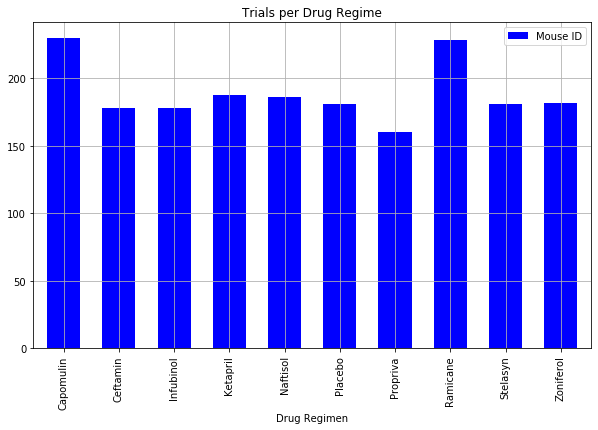

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# "Number of Datapoints" are the "Trails"
datapoints = tumor_summary_df['Mouse ID']
datapoints_pandas_chart = datapoints.plot(kind='bar', color='b' \
                                      ,title='Trials per Drug Regime' \
                                      ,subplots=False, figsize=(10,6) \
                                      ,grid=True, legend=True, width=0.6)
plt_bar1 = plt.gcf()
plt.show()
plt.tight_layout()

plt_bar1.savefig("./output/fig_01-bar_chart_pandas.png", bbox_inches='tight')

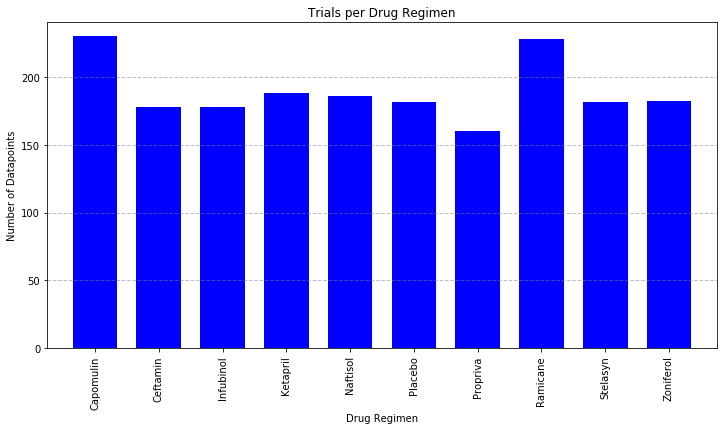

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(datapoints))
tick_locations =[i for i in x_axis]
data = tumor_summary_df['Mouse ID']
plt.figure(figsize=(12,6))

plt.bar(x_axis, data, color='b', width=0.7, label='Trial')
plt.xticks(tick_locations, data.index.values, rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tumor_summary_df['Mouse ID'])+10)
plt.grid(color='grey', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Datapoints')
plt.title('Trials per Drug Regimen')
plt.legend=True

plt_bar2 = plt.gcf()
plt.show()
plt.tight_layout()

plt_bar2.savefig("./output/fig_02-bar_chart_pyplot.png", bbox_inches='tight')

## Pie plots

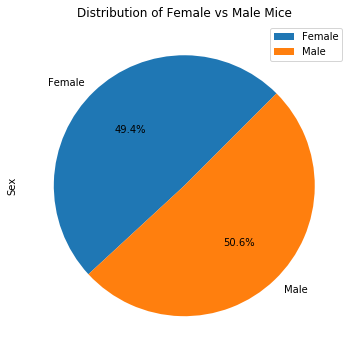

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# df.plot(kind='pie',subplots=True,figsize=(10,10),startangle=45)
tumor_sex_df = pd.DataFrame(mouse_study_df.groupby(['Sex'])['Mouse ID'].count())
# Rename the column "Mouse ID" to "Sex" for labeling
tumor_sex_df = tumor_sex_df.rename(columns={'Mouse ID': 'Sex'})

# Plot the Pie chart using Pandas
tumor_sex_df.plot(kind='pie', labels=tumor_sex_df.index.values, autopct="%1.1f%%" \
                 ,subplots=True, figsize=(6,6), startangle=45, legend=True)

plt.title("Distribution of Female vs Male Mice")

plt.savefig("./output/fig_03-pie_chart_pandas.png", bbox_inches='tight')

plt.show()
plt.tight_layout()

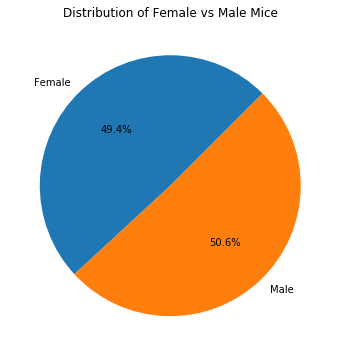

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = tumor_sex_df['Sex'].values
labels = tumor_sex_df['Sex'].index

plt.figure(figsize=(6, 6))
plt.title('Distribution of Female vs Male Mice')
plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=45)
plt.legend=True

plt.savefig("./output/fig_04-pie_chart_pyplot.png", bbox_inches='tight')

plt.show()
plt.tight_layout()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising 
#  treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
# Calculate the quartiles and IQR and quantitatively determine if there 
#  are any potential outliers across all four treatment regimens.

In [10]:
# Capomulin Regimen
# Filter DataFrame to for Capomulin Regimen and proceed with the calculations
capomulin_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(['Capomulin'])]

# Sort by DataFrame by 'Mouse ID' (Ascending) and 'Timpepoint' (Descending)
capomulin_df = capomulin_df.sort_values(['Mouse ID','Timepoint'], ascending=[True, False])

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
capomulin_dd_df = capomulin_df.drop_duplicates(subset=['Mouse ID'], keep='first')

# Determine quartiles
quartiles = capomulin_dd_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[0.25]      # Lower Quartile
uq = quartiles[0.75]      # Upper Quartile
iqr = uq-lq               # Inter Quartile Range

# Determine upper and lower bounds
lb = lq - (1.5*iqr)       # Lower Bound
ub = uq + (1.5*iqr)       # Upper Bound

# Determine Minimum and Maximum values
# (This helps to know if any outliers are expected) 
min_val = min(capomulin_dd_df['Tumor Volume (mm3)'])   # Minimum Value
max_val = max(capomulin_dd_df['Tumor Volume (mm3)'])   # Upper Value

print(f'The Quartile data for Capomulin Regimen is: \n \
    Lower Quartile = {lq}     \n \
    Upper Quartile = {uq}     \n \
    IQR            = {iqr}    \n \
    Lower Bound    = {lb}     \n \
    Upper Bound    = {ub}     \n \
    Min Value      = {min_val}\n \
    Max Value      = {max_val}')

# Print a filtered dataframe of any outliers
capomulin_outliers_df = capomulin_dd_df.loc[ (capomulin_dd_df['Tumor Volume (mm3)'] < lb) 
                                            |(capomulin_dd_df['Tumor Volume (mm3)'] > ub), :]
capomulin_outliers_df

The Quartile data for Capomulin Regimen is: 
     Lower Quartile = 32.37735684     
     Upper Quartile = 40.1592203     
     IQR            = 7.781863460000004    
     Lower Bound    = 20.70456164999999     
     Upper Bound    = 51.83201549     
     Min Value      = 23.34359787
     Max Value      = 47.68596303


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


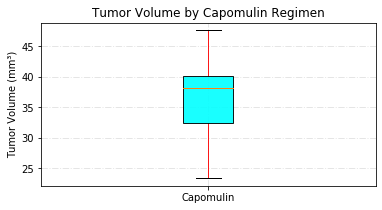

In [11]:
fig1, ax1, = plt.subplots(1, figsize=(6,3))
ax1.set_title('Tumor Volume by Capomulin Regimen')
ax1.set_ylabel('Tumor Volume (mm³)')
ax1.set_xticklabels(capomulin_dd_df['Drug Regimen'])
ax1.grid(color='grey', ls='-.', lw=1,  alpha=0.2)

line_props = dict(color='r', alpha=0.9)
bbox_props = dict(facecolor='cyan', alpha=0.9, linestyle='dashdot')
flier_props = dict( markerfacecolor='r', markeredgecolor='k'
                   ,marker='o', markersize=15)

plt.boxplot( capomulin_dd_df['Tumor Volume (mm3)'], patch_artist=True
            ,whiskerprops=line_props,boxprops=bbox_props
            ,flierprops=flier_props)
plt.show()

# Save the figure
fig1.savefig('./output/fig_05-boxplot1_capomulin.png', bbox_inches='tight', dpi=300, transparent=True)

In [12]:
# Ramicane Regimen
# Filter DataFrame to for Ramicane Regimen and proceed with the calculations
ramicane_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(['Ramicane'])]

# Sort by DataFrame by 'Mouse ID' (Ascending) and 'Timpepoint' (Descending)
ramicane_df = ramicane_df.sort_values(['Mouse ID','Timepoint'], ascending=[True, False])

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
ramicane_dd_df = ramicane_df.drop_duplicates(subset=['Mouse ID'], keep='first')

# Determine quartiles
quartiles = ramicane_dd_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[0.25]      # Lower Quartile
uq = quartiles[0.75]      # Upper Quartile
iqr = uq-lq               # Inter Quartile Range

# Determine upper and lower bounds
lb = lq - (1.5*iqr)       # Lower Bound
ub = uq + (1.5*iqr)       # Upper Bound

# Determine Minimum and Maximum values
# (This helps to know if any outliers are expected) 
min_val = min(ramicane_dd_df['Tumor Volume (mm3)'])   # Minimum Value
max_val = max(ramicane_dd_df['Tumor Volume (mm3)'])   # Upper Value

print(f'The Quartile data for Ramicane Regimen is: \n \
    Lower Quartile = {lq}     \n \
    Upper Quartile = {uq}     \n \
    IQR            = {iqr}    \n \
    Lower Bound    = {lb}     \n \
    Upper Bound    = {ub}     \n \
    Min Value      = {min_val}\n \
    Max Value      = {max_val}')

# Print a filtered dataframe of any outliers
ramicane_outliers_df = ramicane_dd_df.loc[ (ramicane_dd_df['Tumor Volume (mm3)'] < lb) 
                                          |(ramicane_dd_df['Tumor Volume (mm3)'] > ub), :]
ramicane_outliers_df

The Quartile data for Ramicane Regimen is: 
     Lower Quartile = 31.56046955     
     Upper Quartile = 40.65900627     
     IQR            = 9.098536719999998    
     Lower Bound    = 17.912664470000003     
     Upper Bound    = 54.30681135     
     Min Value      = 22.05012627
     Max Value      = 45.22086888


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


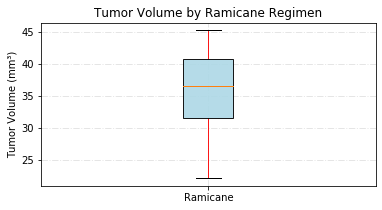

In [13]:
fig2, ax2, = plt.subplots(1, figsize=(6,3))
ax2.set_title('Tumor Volume by Ramicane Regimen')
ax2.set_ylabel('Tumor Volume (mm³)')
ax2.set_xticklabels(ramicane_dd_df['Drug Regimen'])
ax2.grid(color='grey', ls='-.', lw=1,  alpha=0.2)

line_props = dict(color='r', alpha=0.9)
bbox_props = dict(facecolor='lightblue', alpha=0.9, linestyle='dashdot')
flier_props = dict( markerfacecolor='r', markeredgecolor='k'
                   ,marker='o', markersize=15)

plt.boxplot( ramicane_dd_df['Tumor Volume (mm3)'], patch_artist=True
            ,whiskerprops=line_props,boxprops=bbox_props
            ,flierprops=flier_props)
plt.show()

# Save the figure
fig2.savefig('./output/fig_06-boxplot2_ramicane.png', bbox_inches='tight', dpi=300, transparent=True)

In [14]:
# Infubinol Regimen
# Filter DataFrame to for Ramicane Regimen and proceed with the calculations
infubinol_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(['Infubinol'])]

# Sort by DataFrame by 'Mouse ID' (Ascending) and 'Timpepoint' (Descending)
infubinol_df = infubinol_df.sort_values(['Mouse ID','Timepoint'], ascending=[True, False])

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
infubinol_dd_df = infubinol_df.drop_duplicates(subset=['Mouse ID'], keep='first')

# Determine quartiles
quartiles = infubinol_dd_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[0.25]      # Lower Quartile
uq = quartiles[0.75]      # Upper Quartile
iqr = uq-lq               # Inter Quartile Range

# Determine upper and lower bounds
lb = lq - (1.5*iqr)       # Lower Bound
ub = uq + (1.5*iqr)       # Upper Bound

# Determine Minimum and Maximum values
# (This helps to know if any outliers are expected) 
min_val = min(infubinol_dd_df['Tumor Volume (mm3)'])   # Minimum Value
max_val = max(infubinol_dd_df['Tumor Volume (mm3)'])   # Upper Value

print(f'The Quartile data for Infubinol Regimen is: \n \
    Lower Quartile = {lq}     \n \
    Upper Quartile = {uq}     \n \
    IQR            = {iqr}    \n \
    Lower Bound    = {lb}     \n \
    Upper Bound    = {ub}     \n \
    Min Value      = {min_val}\n \
    Max Value      = {max_val}')

# Print a filtered dataframe of any outliers
infubinol_outliers_df = infubinol_dd_df.loc[ (infubinol_dd_df['Tumor Volume (mm3)'] < lb) 
                                            |(infubinol_dd_df['Tumor Volume (mm3)'] > ub), :]

The Quartile data for Infubinol Regimen is: 
     Lower Quartile = 54.04860769     
     Upper Quartile = 65.52574285     
     IQR            = 11.477135160000003    
     Lower Bound    = 36.83290494999999     
     Upper Bound    = 82.74144559000001     
     Min Value      = 36.321345799999996
     Max Value      = 72.2267309


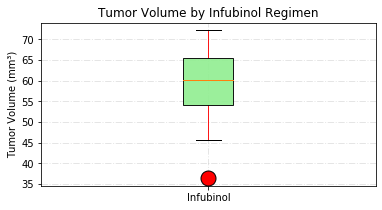

In [15]:
fig3, ax3, = plt.subplots(1, figsize=(6,3))
ax3.set_title('Tumor Volume by Infubinol Regimen')
ax3.set_ylabel('Tumor Volume (mm³)')
ax3.set_xticklabels(infubinol_dd_df['Drug Regimen'])
ax3.grid(color='grey', ls='-.', lw=1,  alpha=0.2)

line_props = dict(color='r', alpha=0.9)
bbox_props = dict(facecolor='lightgreen', alpha=0.9, linestyle='dashdot')
flier_props = dict( markerfacecolor='r', markeredgecolor='k'
                   ,marker='o', markersize=15)

plt.boxplot( infubinol_dd_df['Tumor Volume (mm3)'], patch_artist=True
            ,whiskerprops=line_props,boxprops=bbox_props
            ,flierprops=flier_props)
plt.show()

# Save the figure
fig3.savefig('./output/fig_07-boxplot3_infubinol.png', bbox_inches='tight', dpi=300, transparent=True)

In [16]:
# Ceftamin Regimen
# Filter DataFrame to for Ramicane Regimen and proceed with the calculations
ceftamin_df = mouse_study_df.loc[mouse_study_df['Drug Regimen'].isin(['Ceftamin'])]

# Sort by DataFrame by 'Mouse ID' (Ascending) and 'Timpepoint' (Descending)
ceftamin_df = ceftamin_df.sort_values(['Mouse ID','Timepoint'], ascending=[True, False])

# Dropping duplicates, keeping first value, should be the latest timepoint per mouse
ceftamin_dd_df = ceftamin_df.drop_duplicates(subset=['Mouse ID'], keep='first')

# Determine quartiles
quartiles = ceftamin_dd_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lq = quartiles[0.25]      # Lower Quartile
uq = quartiles[0.75]      # Upper Quartile
iqr = uq-lq               # Inter Quartile Range

# Determine upper and lower bounds
lb = lq - (1.5*iqr)       # Lower Bound
ub = uq + (1.5*iqr)       # Upper Bound

# Determine Minimum and Maximum values
# (This helps to know if any outliers are expected) 
min_val = min(ceftamin_dd_df['Tumor Volume (mm3)'])   # Minimum Value
max_val = max(ceftamin_dd_df['Tumor Volume (mm3)'])   # Upper Value

print(f'The Quartile data for Ceftamin Regimen is: \n \
    Lower Quartile = {lq}     \n \
    Upper Quartile = {uq}     \n \
    IQR            = {iqr}    \n \
    Lower Bound    = {lb}     \n \
    Upper Bound    = {ub}     \n \
    Min Value      = {min_val}\n \
    Max Value      = {max_val}')

# Print a filtered dataframe of any outliers
ceftamin_outliers_df = ceftamin_dd_df.loc[ (ceftamin_dd_df['Tumor Volume (mm3)'] < lb) 
                                          |(ceftamin_dd_df['Tumor Volume (mm3)'] > ub), :]
ceftamin_outliers_df

The Quartile data for Ceftamin Regimen is: 
     Lower Quartile = 48.72207785     
     Upper Quartile = 64.29983003     
     IQR            = 15.577752179999997    
     Lower Bound    = 25.355449580000002     
     Upper Bound    = 87.66645829999999     
     Min Value      = 45.0
     Max Value      = 68.92318457


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


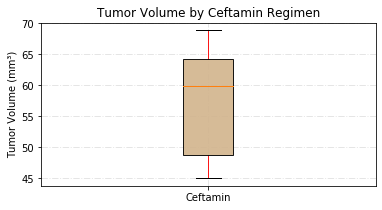

In [17]:
fig4, ax4, = plt.subplots(1, figsize=(6, 3))
ax4.set_title('Tumor Volume by Ceftamin Regimen')
ax4.set_ylabel('Tumor Volume (mm³)')
ax4.set_xticklabels(ceftamin_dd_df['Drug Regimen'])
ax4.grid(color='grey', ls='-.', lw=1,  alpha=0.2)


line_props = dict(color='r', alpha=0.9)
bbox_props = dict(facecolor='tan', alpha=0.9, linestyle='dashdot')
flier_props = dict( markerfacecolor='r', markeredgecolor='k'
                   ,marker='o', markersize=15)

plt.boxplot( ceftamin_dd_df['Tumor Volume (mm3)'], patch_artist=True
            ,whiskerprops=line_props,boxprops=bbox_props
            ,flierprops=flier_props)
plt.show()

# Save the figure
fig4.savefig('./output/fig_08-boxplot4_ceftamin.png', bbox_inches='tight', dpi=300, transparent=True)

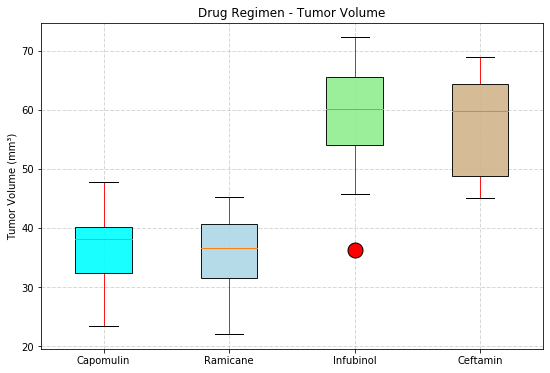

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# create a list of the 4 DataFrames for creating a one Box Plot woth 4 set of values.
combined_plot = [ capomulin_dd_df['Tumor Volume (mm3)']
                 ,ramicane_dd_df['Tumor Volume (mm3)']
                 ,infubinol_dd_df['Tumor Volume (mm3)']
                 ,ceftamin_dd_df['Tumor Volume (mm3)']]

fig, ax, = plt.subplots(1, figsize=(9, 6))

ax.set_title('Drug Regimen - Tumor Volume')
ax.set_ylabel('Tumor Volume (mm³)')
ax.set_xticklabels([ max(capomulin_dd_df['Drug Regimen'])
                    ,max(ramicane_dd_df['Drug Regimen'])
                    ,max(infubinol_dd_df['Drug Regimen'])
                    ,max(ceftamin_dd_df['Drug Regimen'])])
ax.grid(color='grey', ls='--', lw=1,  alpha=0.3)


line_props = dict(color='r', alpha=0.9)
bbox_props = dict(alpha=0.9, linestyle="dashdot")
flier_props = dict(markerfacecolor='r', markeredgecolor='k', marker="o", markersize=15)
    
# Create the boxplot
bp = ax.boxplot( combined_plot, patch_artist=True, whiskerprops=line_props
                ,boxprops=bbox_props, flierprops=flier_props)

#Set the colors for the Box Props
colors = ['cyan', 'lightblue', 'lightgreen', 'tan']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Save the figure
fig.savefig('./output/fig_09-boxplot5_combined.png', bbox_inches='tight', dpi=300, transparent=True)

## Line and scatter plots

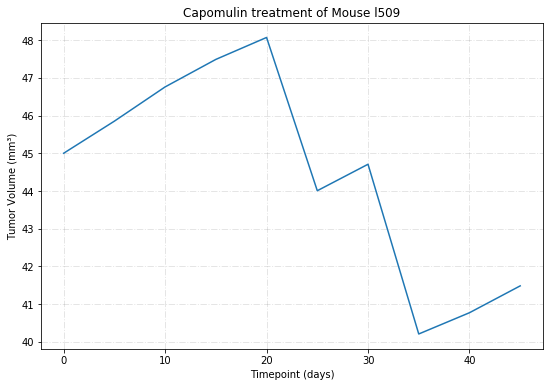

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Use data for 'Mouse ID' = l509

# Filter DataFrame to for Capomulin Regimen and proceed with the calculations
l509_df = mouse_study_df.loc[  mouse_study_df['Drug Regimen'].isin(['Capomulin']) 
                             & mouse_study_df['Mouse ID'].isin(['l509'])]

# Set variables to hold relevant data
timepoint = l509_df['Timepoint']
tumor_volume = l509_df['Tumor Volume (mm3)']

# Plot the tumor volume for various mice
line_fig, line_ax, = plt.subplots(1, figsize=(9, 6))
line_ax.plot(timepoint, tumor_volume)
line_ax.grid(color='grey', ls='-.', lw=1,  alpha=0.2)

# Show the chart, add labels
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.title('Capomulin treatment of Mouse l509')
plt.show()

# Save the figure
line_fig.savefig('./output/fig_10-lineplot_capomulin.png', bbox_inches='tight', dpi=300, transparent=True)

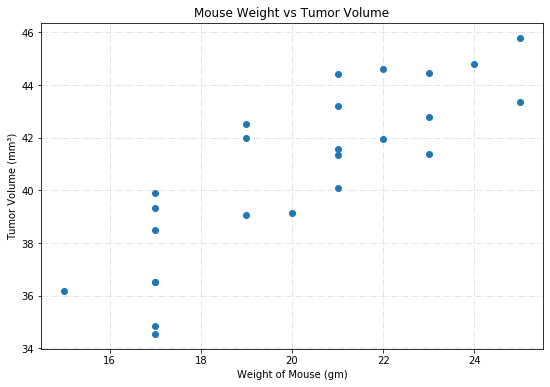

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Filter DataFrame to for Capomulin Regimen and proceed with the calculations
# Since the data is duplicated for the mouse (by Mouse ID),
#  mean() can be used for calculation.

# Set variables to hold relevant data
cap_mouse_weight = capomulin_df.groupby(capomulin_df['Mouse ID'])['Weight (g)'].mean()
cap_tumor_volume = capomulin_df.groupby(capomulin_df['Mouse ID'])['Tumor Volume (mm3)'].mean()

# Create a Scatter plot of Mouse Weight vs Tumor Volume for the mice
line_fig2, line_ax2, = plt.subplots(1, figsize=(9, 6))
line_ax2.scatter(cap_mouse_weight, cap_tumor_volume)
line_ax2.grid(color='grey', ls='-.', lw=1,  alpha=0.2)

# Show the chart, add labels
plt.xlabel('Weight of Mouse (gm)')
plt.ylabel('Tumor Volume (mm³)')
plt.title('Mouse Weight vs Tumor Volume')
plt.show()

# Save the figure
line_fig2.savefig('./output/fig_11-scatterplot1_weigth_tumor.png', bbox_inches='tight', dpi=300, transparent=True)

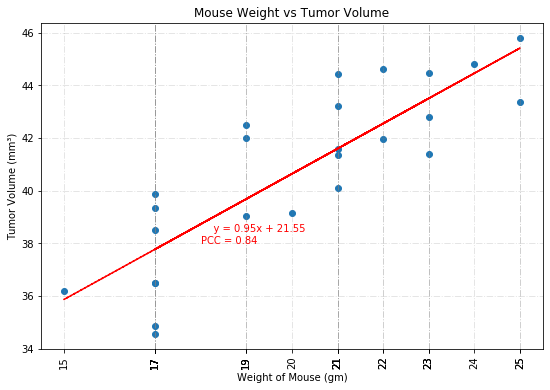

The Pearson Correlation Coefficient value for Mouse Weight and Tumor Volume is: 0.84


In [21]:
# Calculate the correlation coefficient and linear regression model 
#  for mouse weight and average tumor volume for the Capomulin regimen

# Use the mouse weight and the tumor volume data from the above cell

# Perform a linear regression on year versus violent crime rate
slope, intercept, r, p, std_err = st.linregress(cap_mouse_weight, cap_tumor_volume)

# Calculate correlation coefficient
corr = round(st.pearsonr(cap_mouse_weight,cap_tumor_volume)[0],2)

# Create equation of line to calculate predicted violent crime rate
fit = slope * cap_mouse_weight + intercept
# Variable to hold the Line Equation and the PCC
line_eq_pcc =  "    y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) \
             + "\nPCC = " + str(round(corr,2))

# Create a Scatter plot of Mouse Weight vs Tumor Volume for the mice
line_fig3, line_ax3, = plt.subplots(1, figsize=(9, 6))
line_ax3.scatter(cap_mouse_weight, cap_tumor_volume)

# Show the chart, add labels
plt.xlabel('Weight of Mouse (gm)')
plt.ylabel('Tumor Volume (mm³)')
plt.title('Mouse Weight vs Tumor Volume')
plt.annotate(line_eq_pcc, (18,38), fontsize=10, color='r')

# Plot the linear model on top of scatter plot 
plt.plot(cap_mouse_weight,fit,"r--")
plt.xticks(cap_mouse_weight, rotation=90)
line_ax3.grid(color='grey', ls='-.', lw=1,  alpha=0.2)

plt.show()
# Save the figure
line_fig3.savefig('./output/fig_12-scatterplot2_pcc.png', bbox_inches='tight', dpi=300, transparent=True)

print(f'The Pearson Correlation Coefficient value for Mouse Weight and Tumor Volume is: {corr:.2}')